In [8]:
from codes.python import load_database,ECG_denoising
from codes.python import QRS_detector
import numpy as np
from scipy import signal
from scipy.signal import savgol_filter
import operator
from numpy import array
import sys
import csv
import os
import matplotlib.pyplot as plt
import wfdb
from wfdb import processing, plot
from codes.python import heartbeat_segmentation as shs
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.preprocessing import normalize
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
import pywt
from biosppy.signals import ecg
from sklearn import metrics
#import waipy
import operator
from codes.python import ecg_waveform_extractor as waveform
import time as system_time
from scipy import stats
import warnings
import termcolor as colored
from math import*

In [9]:
def average(numbers):
    return float(sum(numbers)) / len(numbers)

In [10]:
mitdb = load_database.load_mitdb()
mitdb.segment_beats()

C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/100
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/100.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/100.txt
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/p_t_wave/100pt.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/101
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/101.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/101.txt
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/p_t_wave/101pt.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/102
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/102.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/102.txt
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/p_t_wave/102pt

C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/201.txt
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/p_t_wave/201pt.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/202
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/202.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/202.txt
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/p_t_wave/202pt.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/203
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/203.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/203.txt
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/p_t_wave/203pt.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/205
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/205

Filtered MLII records from : 102
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 102 completes.
Start segmenting records: 103
Filtered MLII records from : 103
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 103 completes.
Start segmenting records: 104
Filtered MLII records from : 104
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 104 completes.
Start segmenting records: 105
Filtered MLII records from : 105
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 105 completes.
Start segmenting records: 106
Filtered MLII records from : 106
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 106 completes.
Start segmenting records: 107
Filtered MLII records from : 107
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 107 completes.
Start segmenting records: 108
Filtered MLII records from : 108
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 108 completes.
Start segmentin

In [11]:
for i in range(0,len(mitdb.patient_records)):
    print(mitdb.patient_records[i].filename, i)
    

100 0
101 1
102 2
103 3
104 4
105 5
106 6
107 7
108 8
109 9
111 10
112 11
113 12
114 13
115 14
116 15
117 16
118 17
119 18
121 19
122 20
123 21
124 22
200 23
201 24
202 25
203 26
205 27
207 28
208 29
209 30
210 31
212 32
213 33
214 34
215 35
217 36
219 37
220 38
221 39
222 40
223 41
228 42
230 43
231 44
232 45
233 46
234 47


In [12]:
mit100 = load_database.load_patient_record("mitdb","100")
mit100.set_segmented_beats_r_pos(winL=100,winR=200)
filtere_MLII = mit100.filtered_MLII
beats, poses = shs.segment(filtere_MLII,100,50,50,25)
assert len(beats) == 100
assert max(filtere_MLII[beats]) == filtere_MLII[poses],"max(pos) isn't equal to r_pos "
count = 0
assert shs.check_class_AAMI('N',-1) == 0

for patient in mitdb.patient_records:
    patient.set_r_properties_MLII()
    patient.set_Q_S_points_MLII()




                             
    



C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/100
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/100.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/100.txt
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/p_t_wave/100pt.csv
Start segmenting records: 100
Filtered MLII records from : 100
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 100 completes.
Processing file: 100
Patient file:  100 begins
Patient file:  100 processing end
Done proecessing: 100
Processing file: 100
Patient file:  100 begins
Done proecessing: 100
Processing file: 101
Patient file:  101 begins
Patient file:  101 processing end
Done proecessing: 101
Processing file: 101
Patient file:  101 begins
Done proecessing: 101
Processing file: 102
Patient file:  102 begins
Patient file:  102 processing end
Done proecessing: 102
Processing file: 102
Patient file:  102 begins
Done proecessing: 102
Proc

Done proecessing: 231
Processing file: 232
Patient file:  232 begins
Patient file:  232 processing end
Done proecessing: 232
Processing file: 232
Patient file:  232 begins
Done proecessing: 232
Processing file: 233
Patient file:  233 begins
Patient file:  233 processing end
Done proecessing: 233
Processing file: 233
Patient file:  233 begins
Done proecessing: 233
Processing file: 234
Patient file:  234 begins
Patient file:  234 processing end
Done proecessing: 234
Processing file: 234
Patient file:  234 begins
Done proecessing: 234


In [225]:

r = mit100.segmented_R_pos[0]
r_sig = mit100.filtered_MLII[r-50:r+50]
distance=1
width=[0,100]
plateau_size=[0,100]
h = min(r_sig)

peak, prop = signal.find_peaks(r_sig,height=h, distance=distance,width=width,plateau_size=plateau_size)
peak = np.asarray(peak)
hi = np.asarray((highest_peak(peak, r_sig)))
index = find_index(peak,hi)

or_peak = point_transform_to_origin(hi,r-50)
#assert or_peak == mit100.R_pos_properites["peaks"][0]
print(mit100.R_pos_properites)

None


In [161]:
count = 0
for patient in mitdb.patient_records:
    
    
    print(patient.filename, count)
    count += 1
    assert len(patient.original_R_pos) == len(patient.segmented_R_pos) == len(patient.segmented_beat_time) == len(patient.segmented_beat_index),"Unequal length, should be equal in length"
    assert len(patient.segmented_beat_1) == len(patient.segmented_class_ID) == len(patient.segmented_beat_class),"Unequal lens, should be equal in length"
    
    
    assert len(patient.Q_points) == len(patient.S_points),"Unequal lens, should be equal in length"
    assert len(patient.segmented_R_pos) == len(patient.S_points),"Unequal lens, should be equal in length"
    r_properties = patient.R_pos_properites
    q_props = patient.Q_points_properites
    s_props = patient.S_points_properites
    assert len(r_properties["height"]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length"
    assert len(q_props["height"]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length"
    assert len(s_props["height"]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length"

    assert average(r_properties["height"]) < 3,"Average height of r_peak for patient "+ patient.filename+ " is greater than 3"
    assert average(q_props["height"]) < 3,"Average height of q_peak for patient "+ patient.filename+ " is greater than 1"
    assert average(s_props["height"]) < 3,"Average height of s_peak for patient "+ patient.filename+ " is greater than 1"

    assert average(r_properties["height"]) > 0.5,"Average height of r_peak for patient " +patient.filename+ " is less than 0.5"
    assert average(q_props["height"]) > 0,"Average height of q_peak for patient " +patient.filename+ " is less than 0"
    assert average(s_props["height"]) > 0,"Average height of s_peak for patient " +patient.filename+ " is less than 0"
    
    assert min(r_properties["height"]) >= 0,"Min height of r_peak for patient " +patient.filename+ " is less than 0"
    assert min(q_props["height"]) >= 0,"Min height of q_peak for patient " +patient.filename+ " is less than 0"
    assert min(s_props["height"]) >= 0,"Min height of q_peak for patient " +patient.filename+ " is less than 0"

    assert max(r_properties["height"]) < 5,"Max height of r_peak for patient " +patient.filename+ " is greater than 5"
    assert max(q_props["height"]) < 5,"Max height of q_peak for patient " +patient.filename+ " is greater than 3"
    assert max(s_props["height"]) < 5,"Max height of s_peak for patient " +patient.filename+ " is greater than 3"

    x ,y  = np.unique(r_properties["height"], return_counts=True) # counting occurrence of each loan
    index = np.where(x==0)
    index = np.asarray(index)
    if(index.size != 0):
        
        if(y[index[0]] > 20):
            warnings.warn("height equal to 0 number is greater then 20 in " + patient.filename + " record with 0 height number of "+ str(y[index[0]]))
        
    
    assert len(r_properties["durations"]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length"
    assert len(q_props["durations"]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length"
    assert len(s_props["durations"]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length"

    assert average(r_properties["durations"]) < 0.09,"Average duration of r_peak for patient "+ patient.filename+ " is greater than 0.09"
    assert average(q_props["durations"]) < 0.09,"Average duration of q_peak for patient "+ patient.filename+ " is greater than 0.05"
    assert average(s_props["durations"]) < 0.09,"Average duration of s_peak for patient "+ patient.filename+ " is greater than 0.05"

    assert average(r_properties["durations"]) > 0.01,"Average durations of r_peak for patient " +patient.filename+ " is less than 0.01"
    assert average(q_props["durations"]) > 0.001,"Average durations of q_peak for patient " +patient.filename+ " is less than 0.001"
    assert average(s_props["durations"]) > 0.001,"Average durations of s_peak for patient " +patient.filename+ " is less than 0.001"

    assert min(r_properties["durations"]) >= 0,"Min durations of r_peak for patient " +patient.filename+ " is less than 0"
    assert min(q_props["durations"]) >= 0,"Min durations of q_peak for patient " +patient.filename+ " is less than 0"
    assert min(s_props["durations"]) >= 0,"Min durations of s_peak for patient " +patient.filename+ " is less than 0"

    assert max(r_properties["durations"]) < 0.3,"Max durations of r_peak for patient " +patient.filename+ " is greater than 0.3"
    assert max(q_props["durations"]) < 0.3,"Max durations of q_peak for patient " +patient.filename+ " is greater than 0.2"
    assert max(s_props["durations"]) < 0.3,"Max durations of s_peak for patient " +patient.filename+ " is greater than 0.2"

    x ,y  = np.unique(r_properties["durations"], return_counts=True) # counting occurrence of each loan
    index = np.where(x==0)
    index = np.asarray(index)
    if(index.size != 0):
        
        if(y[index[0]] > 20):
            warnings.warn("durations equal to 0 number is greater then 20 in " + patient.filename + " record with 0 durations number of "+ str(y[index[0]]))
        
    
    assert len(r_properties["onset"]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length"   
    assert len(q_props["onset"]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length"   
    assert len(s_props["onset"]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length"   

    assert len(r_properties["offset"]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length"
    assert len(q_props["offset"]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length"   
    assert len(s_props["offset"]) == len(patient.segmented_R_pos),"Unequal lens, should be equal in length" 
    
    #print(r_properties["offset"])

    for i in range(1,len(patient.segmented_R_pos)-1):
        assert len(patient.segmented_beat_1[i])==len(patient.segmented_beat_1[i+1]), "Unequal lens, should be equal in length"
        assert len(patient.segmented_beat_time[i]) == len(patient.segmented_beat_time[i+1]), "Unequal lens, should be equal in length"
        assert len(patient.segmented_beat_1[i])==len(patient.segmented_beat_time[i]), "Unequal lens, should be equal in length"
        assert patient.segmented_R_pos[i] <= patient.segmented_R_pos[i+1], "the later r_pos is smaller " + patient.filename + " R_peak: " + str(patient.segmented_R_pos[i]) +" "+  str(patient.segmented_R_pos[i+1])
        assert len(q_props["amplitudes"][i]) == 10, "The list of amplitudes is not equal to 10 in patient " + patient.filename + " "+ str(len(q_props["amplitudes"][i]))
        assert len(r_properties["amplitudes"][i]) == 10, "The list of amplitudes is not equal to 10 in patient " + patient.filename + " "+ str(len(r_properties["amplitudes"][i]))
        assert len(s_props["amplitudes"][i]) == 10, "The list of amplitudes is not equal to 10 in patient " + patient.filename + " "+ str(len(s_props["amplitudes"][i]))

        assert r_properties["peaks"][i] <=  patient.segmented_R_pos[i]+6,"the peak position is not in range : Patient " + patient.filename+ " R_peak: " + str(r_properties["peaks"][i])
        assert r_properties["peaks"][i] >=  patient.segmented_R_pos[i]-6,"the peak position is not in range : Patient " + patient.filename+ " R_peak: " + str(r_properties["peaks"][i])
        assert r_properties["peaks"][i] <=  r_properties["peaks"][i+1], "the later peak position is smaller: Patient " + patient.filename+ " R_peak: " + str(r_properties["peaks"][i]) 
        if(r_properties["offset"][i] < r_properties["peaks"][i]):
            warnings.warn("r_peak is larger than offset. File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
        if(r_properties["onset"][i] > r_properties["peaks"][i]):
            warnings.warn("onset is larger than r_peak. File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
        if(r_properties["onset"][i] > r_properties["onset"][i+1]):
            warnings.warn("the later onset is larger than current onset. File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
        if(r_properties["offset"][i] > r_properties["offset"][i+1]):
            warnings.warn("the later offset is larger than current offset. File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
        #  assert max()
        
        point_list = list(range(patient.segmented_R_pos[i-1],patient.segmented_R_pos[i]))
        if((patient.Q_points[i] in point_list)==False):
            warnings.warn("the current q point is not in the range current  pre_r . File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
        if(patient.Q_points[i+1] in point_list):
            warnings.warn("the later q point is in the range of the  current q_point. File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
        
        if(patient.Q_points[i-1] in point_list):
            warnings.warn("the former q point is in the range of the  current q_point. File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
        
        if(patient.Q_points[i] > patient.Q_points[i+1]):
            warnings.warn("the current q point is greater than the later q_point. File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
       
        if(q_props["offset"][i] < q_props["peaks"][i]):
            warnings.warn("q_peak is larger than offset. File name: "+ patient.filename + ". q_peak: "+ str(q_props["peaks"][i]))
        if(q_props["onset"][i] > q_props["peaks"][i]):
            warnings.warn("onset is larger than q_peak. File name: "+ patient.filename + ". q_peak: "+ str(q_props["peaks"][i]))
        if(q_props["onset"][i] > q_props["onset"][i+1]):
            warnings.warn("the later onset is larger than current onset. File name: "+ patient.filename + ". q_peak: "+ str(q_props["peaks"][i]))
        if(q_props["offset"][i] > q_props["offset"][i+1]):
            warnings.warn("the later offset is larger than current offset. File name: "+ patient.filename + ". q_peak: "+ str(q_props["peaks"][i]))
        #  assert max()
        
        if(s_props["offset"][i] < s_props["peaks"][i]):
            warnings.warn("s_peak is larger than offset. File name: "+ patient.filename + ". s_peak: "+ str(s_props["peaks"][i]))
        if(s_props["onset"][i] > s_props["peaks"][i]):
            warnings.warn("onset is larger than s_peak. File name: "+ patient.filename + ". s_peak: "+ str(s_props["peaks"][i]))
        if(s_props["onset"][i] > s_props["onset"][i+1]):
            warnings.warn("the later onset is larger than current onset. File name: "+ patient.filename + ". s_peak: "+ str(s_props["peaks"][i]))
        if(s_props["offset"][i] > s_props["offset"][i+1]):
            warnings.warn("the later offset is larger than current offset. File name: "+ patient.filename + ". s_peak: "+ str(s_props["peaks"][i]))
        #  assert max()
        
        
        point_list_2 = list(range(patient.segmented_R_pos[i],patient.segmented_R_pos[i+1]))
        if((patient.S_points[i] in point_list_2)==False):
            warnings.warn("the current S point is not in the range current  post_r . File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
        
        if(patient.S_points[i+1] in point_list_2):
            warnings.warn("the later s point is in the range of the  current s_point. File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
        
        if(patient.S_points[i-1] in point_list_2):
            warnings.warn("the former s point is in the range of the  current s_point. File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
         
        if(patient.S_points[i] > patient.S_points[i+1]):
            warnings.warn("the current s point is greater than the later s_point. File name: "+ patient.filename + ". r_peak: "+ str(r_properties["peaks"][i]))
        
        #assert r_properties["onset"][i]  <= r_properties["peaks"][i],"the peak is smaller than onset in " + patient.filename + " onset: " + str(r_properties["onset"][i]) +" peak: "+  str(r_properties["peaks"][i]) 
        #assert r_properties["offset"][i] >= r_properties["peaks"][i],"the peak is larger than offset in " + patient.filename + " offset: " + str(r_properties["offset"][i]) +" peak: "+  str(r_properties["peaks"][i])
       
    #peak,properties= peak_properties_extractor(mit100.filtered_MLII)


100 0
101 1


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:110: UserWarning: the later q point is in the range of the  current q_point. File name: 101. r_peak: 114682
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:123: UserWarning: the later onset is larger than current onset. File name: 101. q_peak: 114667
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:108: UserWarning: the current q point is not in the range current  pre_r . File name: 101. r_peak: 114700


102 2
103 3
104 4


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: height equal to 0 number is greater then 20 in 104 record with 0 height number of [24]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: UserWarning: durations equal to 0 number is greater then 20 in 104 record with 0 durations number of [23]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:110: UserWarning: the later q point is in the range of the  current q_point. File name: 104. r_peak: 59677
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:141: UserWarning: the current S point is not in the range current  post_r . File name: 104. r_peak: 59677
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:108: UserWarning: the current q point is not in the range current  pre_r . File name: 104. r_peak: 59677
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:147: UserWarning: the former s point is in the range of the  current s_point. 

105 5


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: height equal to 0 number is greater then 20 in 105 record with 0 height number of [50]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: UserWarning: durations equal to 0 number is greater then 20 in 105 record with 0 durations number of [46]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:123: UserWarning: the later onset is larger than current onset. File name: 105. q_peak: 371680
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:141: UserWarning: the current S point is not in the range current  post_r . File name: 105. r_peak: 371684
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:147: UserWarning: the former s point is in the range of the  current s_point. File name: 105. r_peak: 371711
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:110: UserWarning: the later q point is in the range of the  current q_point. File nam

106 6
107 7
108 8


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:141: UserWarning: the current S point is not in the range current  post_r . File name: 108. r_peak: 280501
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:147: UserWarning: the former s point is in the range of the  current s_point. File name: 108. r_peak: 280515
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:125: UserWarning: the later offset is larger than current offset. File name: 108. q_peak: 301846
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:110: UserWarning: the later q point is in the range of the  current q_point. File name: 108. r_peak: 334192
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:141: UserWarning: the current S point is not in the range current  post_r . File name: 108. r_peak: 334192
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:108: UserWarning: the current q point is not in the range current  pre_r . File na

109 9
111 10
112 11
113 12
114 13
115 14


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:110: UserWarning: the later q point is in the range of the  current q_point. File name: 115. r_peak: 585808
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:141: UserWarning: the current S point is not in the range current  post_r . File name: 115. r_peak: 585808
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:108: UserWarning: the current q point is not in the range current  pre_r . File name: 115. r_peak: 585816
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:147: UserWarning: the former s point is in the range of the  current s_point. File name: 115. r_peak: 585816
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:110: UserWarning: the later q point is in the range of the  current q_point. File name: 115. r_peak: 591340
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:141: UserWarning: the current S point is not in the range current  post_

116 15
117 16
118 17
119 18


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: height equal to 0 number is greater then 20 in 119 record with 0 height number of [48]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: UserWarning: durations equal to 0 number is greater then 20 in 119 record with 0 durations number of [47]


121 19
122 20
123 21
124 22
200 23


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: height equal to 0 number is greater then 20 in 200 record with 0 height number of [46]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: UserWarning: durations equal to 0 number is greater then 20 in 200 record with 0 durations number of [44]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:110: UserWarning: the later q point is in the range of the  current q_point. File name: 200. r_peak: 347947
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:141: UserWarning: the current S point is not in the range current  post_r . File name: 200. r_peak: 347947
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:108: UserWarning: the current q point is not in the range current  pre_r . File name: 200. r_peak: 347947
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:147: UserWarning: the former s point is in the range of the  current s_poin

201 24
202 25
203 26


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: height equal to 0 number is greater then 20 in 203 record with 0 height number of [36]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: UserWarning: durations equal to 0 number is greater then 20 in 203 record with 0 durations number of [32]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:103: UserWarning: the later offset is larger than current offset. File name: 203. r_peak: 329298
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:110: UserWarning: the later q point is in the range of the  current q_point. File name: 203. r_peak: 329298
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:108: UserWarning: the current q point is not in the range current  pre_r . File name: 203. r_peak: 329321
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:141: UserWarning: the current S point is not in the range current  post_r . File name

205 27


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:123: UserWarning: the later onset is larger than current onset. File name: 205. q_peak: 110270


207 28


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: height equal to 0 number is greater then 20 in 207 record with 0 height number of [115]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: UserWarning: durations equal to 0 number is greater then 20 in 207 record with 0 durations number of [110]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:110: UserWarning: the later q point is in the range of the  current q_point. File name: 207. r_peak: 14669
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:108: UserWarning: the current q point is not in the range current  pre_r . File name: 207. r_peak: 14690


208 29


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: height equal to 0 number is greater then 20 in 208 record with 0 height number of [50]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: UserWarning: durations equal to 0 number is greater then 20 in 208 record with 0 durations number of [47]


209 30
210 31
212 32
213 33
214 34
215 35


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:141: UserWarning: the current S point is not in the range current  post_r . File name: 215. r_peak: 64520
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:147: UserWarning: the former s point is in the range of the  current s_point. File name: 215. r_peak: 64556
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:123: UserWarning: the later onset is larger than current onset. File name: 215. q_peak: 280068
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:141: UserWarning: the current S point is not in the range current  post_r . File name: 215. r_peak: 443163
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:147: UserWarning: the former s point is in the range of the  current s_point. File name: 215. r_peak: 443185


217 36


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: height equal to 0 number is greater then 20 in 217 record with 0 height number of [42]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: UserWarning: durations equal to 0 number is greater then 20 in 217 record with 0 durations number of [39]


219 37


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: height equal to 0 number is greater then 20 in 219 record with 0 height number of [22]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: UserWarning: durations equal to 0 number is greater then 20 in 219 record with 0 durations number of [21]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:133: UserWarning: the later onset is larger than current onset. File name: 219. s_peak: 437768
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:135: UserWarning: the later offset is larger than current offset. File name: 219. s_peak: 437768
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:141: UserWarning: the current S point is not in the range current  post_r . File name: 219. r_peak: 437726
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:150: UserWarning: the current s point is greater than the later s_point. File name: 219. r_peak: 

220 38
221 39


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:141: UserWarning: the current S point is not in the range current  post_r . File name: 221. r_peak: 416045
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:147: UserWarning: the former s point is in the range of the  current s_point. File name: 221. r_peak: 416080


222 40


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: height equal to 0 number is greater then 20 in 222 record with 0 height number of [30]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: UserWarning: durations equal to 0 number is greater then 20 in 222 record with 0 durations number of [28]


223 41
228 42


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: height equal to 0 number is greater then 20 in 228 record with 0 height number of [21]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:141: UserWarning: the current S point is not in the range current  post_r . File name: 228. r_peak: 15805
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:147: UserWarning: the former s point is in the range of the  current s_point. File name: 228. r_peak: 15845


230 43


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: height equal to 0 number is greater then 20 in 230 record with 0 height number of [35]
C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: UserWarning: durations equal to 0 number is greater then 20 in 230 record with 0 durations number of [26]


231 44
232 45
233 46
234 47


In [ ]:
print(average(QRS_properties["interval"]))
print(average(QRS_properties["average_ten"]))
print(average(QRS_properties["average_fifty"]))
print(" ")
print(average(P_Q_properties["interval"]))
print(average(P_Q_properties["average_ten"]))
print(average(P_Q_properties["average_fifty"]))
print(" ")
print(average(P_R_properties["interval"]))
print(average(P_R_properties["average_ten"]))
print(average(P_R_properties["average_fifty"]))
print(average(P_R_neg))
print(" ")
print(average(S_T_properties["interval"]))
print(average(S_T_properties["average_ten"]))
print(average(S_T_properties["average_fifty"]))
print(average(S_T_neg))
print(" ")
print(average(R_T_properties["interval"]))
print(average(R_T_properties["average_ten"]))
print(average(R_T_properties["average_fifty"]))
print(average(R_T_neg))
print(" ")
print(average(P_T_properties["interval"]))
print(average(P_T_properties["average_ten"]))
print(average(P_T_properties["average_fifty"]))
print(average(neg_P_T))
print(average(P_T_neg))
print(average(neg_P_T_neg))


In [7]:
mit100.set_segmented_beats_r_pos(winL=100,winR=200)
mit100.set_r_properties_MLII()
mit100.set_Q_S_points_MLII()
mit100.set_P_T_points_MLII()
mit100.set_rr_intervals()
mit100.set_intervals_and_averages()

Start segmenting records: 100
Filtered MLII records from : 100
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 100 completes.
Processing file: 100
Patient file:  100 begins
Patient file:  100 processing end
Done proecessing: 100
Processing file: 100
Patient file:  100 begins
Done proecessing: 100
Processing file: 100
Patient file:  100 begins
Done proecessing: 100
Processing file: 100
Done proecessing: 100
Processing file: 100
Done proecessing: 100


In [212]:
p_onset = np.asarray(mit100.P_points_properites["onset"][0:5])
p_offset = np.asarray(mit100.P_points_properites["offset"][0:5])
t_onset = np.asarray(mit100.T_points_properites["onset"][0:5])
t_offset = np.asarray(mit100.T_points_properites["offset"][0:5])
leght = np.asarray(mit100.T_points_properites["height"][0:5])
dur = np.asarray(mit100.T_points_properites["durations"][0:5])
prom = np.asarray(mit100.T_points_properites["prominences"][0:5])
t_offset = np.asarray(mit100.T_points_properites["offset"][0:5])
print(p_onset[0:,1])
print(mit100.P_points[0:5])
print(p_offset[0:,1])
print("")
print(t_onset[0:,1])
print(mit100.T_points[0:5])
print(t_offset[0:,1])
print(leght)
print(dur)
print(prom)
#peak_properties_extractor(sig,start_point=None,end_point=None,height=None, distance=None, width = None, plateau_size=None)
    

        
        
   


        

[ 329  628  906 1191 1471]
[321, 604, 884, 1167, 1465]
[ 348  646  923 1212 1498]

[ 328  450  680 1025 1311]
[518, 782, 1063, 1368, 1652]
[ 364  477  699 1055 1342]
[[0.053 0.078]
 [0.069 0.032]
 [0.077 0.01 ]
 [0.049 0.062]
 [0.054 0.053]]
[[0.125 0.072]
 [0.102 0.047]
 [0.117 0.025]
 [0.086 0.056]
 [0.098 0.058]]
[[0.05279714 0.07825294]
 [0.06917709 0.03202814]
 [0.07697424 0.00996766]
 [0.04911366 0.06154574]
 [0.05440571 0.05284159]]


In [38]:
q_peaks = find_Q_point(mit100.filtered_MLII,mit100.time, mit100.segmented_R_pos, time_limit = 0.01,limit=50)
s_peaks = find_S_point(mit100.filtered_MLII,mit100.time, mit100.segmented_R_pos, time_limit = 0.01,limit=50)

In [167]:
pre_r_sig = mit100.filtered_MLII[s_peaks[1]:q_peaks[2]]
post_r_sig = mit100.filtered_MLII[s_peaks[2]:q_peaks[3]]
distance=1
width=[0,100]
plateau_size=[0,100]


In [168]:
peak, prop = signal.find_peaks(post_r_sig, distance=distance,width=width,plateau_size=plateau_size)
peak = np.asarray(peak)
hi = np.asarray((highest_peak(peak, post_r_sig)))
or_peak = point_transform_to_origin(peak,s_peaks[2])
left, right = sudo_k_mean(or_peak, mit100.time, mit100.filtered_MLII)

#wfdb.plot_items(signal=post_r_sig, ann_samp=[hi])


In [206]:
hi = highest_peak(left, mit100.filtered_MLII)
index = find_index(or_peak,hi)
t_peak = peak[index]
print(hi)



point, duration, prominence, height, amp, area, offset, onset=find_values_in_properties(patient=mit100,signal=mit100.filtered_MLII ,peak=t_peak, properties=prop, index=index, sample_from_point=[5,5], start_point=s_peaks[2],to_area=False)

print(point_transform_to_origin(peak[index],s_peaks[2]),peak[index])
print(prop["left_ips"][index], point_transform_to_origin(prop["left_ips"][index],s_peaks[2]), onset)
print(prop["right_ips"][index], point_transform_to_origin(prop["right_ips"][index],s_peaks[2]), offset)
#print(prop["duration"][index], point_transform_to_origin(prop["right_ips"][index],s_peaks[2]), offset)

durations = peak_duration(mit100.time,int(prop["right_ips"][index]), int(prop["left_ips"][index]),s_peaks[2])
print(durations, duration)

h=peak_height(mit100.filtered_MLII, peak[index], prop["prominences"][index],s_peaks[2])
print(height,h)

ampt = amplitude(mit100.filtered_MLII,list(range(hi-5,hi+5)),0)
print(ampt,amp)


1063
1063 108
98.19850573534586 1053.1985057353459 1048
140.19476895030724 1095.1947689503072 1100
0.11699999999999999 0.117
0.077 0.07697424076009399
[0.03952739 0.04288585 0.04594119 0.04931674 0.05243121 0.0539488
 0.05305612 0.05025776 0.04713683 0.04526654] [0.03952739 0.04288585 0.04594119 0.04931674 0.05243121 0.0539488
 0.05305612 0.05025776 0.04713683 0.04526654]


In [200]:
prop

{'plateau_sizes': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1], dtype=int64),
 'left_edges': array([  7,  13,  26,  39,  43,  49,  55,  66,  72,  79,  84, 108, 121,
        127, 137, 145, 150, 167, 180, 212, 225, 240, 258], dtype=int64),
 'right_edges': array([  7,  13,  26,  39,  43,  49,  55,  66,  72,  79,  84, 108, 121,
        127, 137, 145, 150, 167, 180, 212, 225, 240, 258], dtype=int64),
 'prominences': array([0.00996766, 0.00194319, 0.00665864, 0.00025186, 0.0015399 ,
        0.00277853, 0.00273843, 0.00538397, 0.00359015, 0.00079786,
        0.01291386, 0.07697424, 0.0071579 , 0.0008789 , 0.00082376,
        0.0034284 , 0.00122093, 0.00880557, 0.00743386, 0.15493781,
        0.0055082 , 0.00040202, 0.03136   ]),
 'left_bases': array([  0,  11,   0,   0,   0,   0,   0,   0,  69,  76,   0,   0, 117,
        125, 135, 142, 148, 160, 173,   0, 222, 238, 245], dtype=int64),
 'right_bases': array([ 17,  17,  34,  41,  46,  52,  58,  76,  76,  

In [178]:
qrs_durations = []
high_qrs = []
for i in range(0, len(mit100.segmented_R_pos)):
    qrs_duration = round(sub_signal_interval(mit100.time, q_points[i], s_points[i],0),3)
    
    qrs_durations.append(qrs_duration)
    if(qrs_duration>0.14):
        print(mit100.segmented_R_pos[i], qrs_duration, q_points[i], s_points[i])

NameError: name 'q_points' is not defined

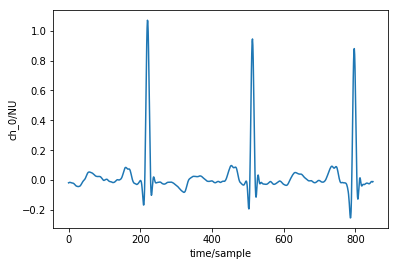

In [16]:
start_point = 150
end_point = 1000
q=546775
s=546841
q_point = origin_to_new_point(start_point,q)
s_point = origin_to_new_point(start_point,s)
annotation = np.asarray([q_point,s_point])
sig = mit100.filtered_MLII[start_point:end_point]
sig = savgol_filter(sig,41,9)
wfdb.plot_items(signal=sig)


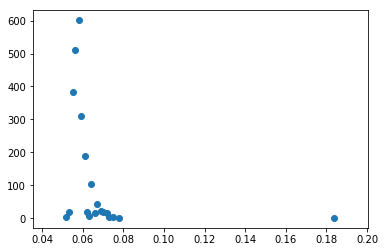

In [17]:
x ,y  = np.unique(qrs_durations, return_counts=True) # counting occurrence of each loan
plt.scatter(x,y)

In [162]:
def average(numbers):
    return float(sum(numbers)) / len(numbers)
def peak_properties_extractor(sig,start_point=None,end_point=None,height=None, distance=None, width = None, plateau_size=None):
    sig = sig[start_point:end_point]
    peaks,properties  = np.asarray(signal.find_peaks(sig, height=height, distance=distance,width=width,plateau_size=plateau_size))
    return peaks,properties

def point_transform_to_origin(por,point):
    point_from_origin = por + point 
    return point_from_origin

def origin_to_new_point(por,point_from_origin):
    point = point_from_origin - por
    return point

def peak_duration(time,right_edge, left_edge,point_from_origin):
    right_edge = point_transform_to_origin(point_from_origin,right_edge)
    left_edge = point_transform_to_origin(point_from_origin,left_edge)
    
    return float(time[right_edge]-time[left_edge])

def sub_signal_interval(time, start_point, end_point,point_from_origin):
    start_point = point_transform_to_origin(point_from_origin,start_point)
    end_point = point_transform_to_origin(point_from_origin,end_point)
    
    return float(time[end_point]-time[start_point])

def peak_height(signal, peak, prominence,point_from_origin):
    peak = point_transform_to_origin(point_from_origin,peak)
    height = signal[peak]-(signal[peak] - prominence)
    return height

def area_under_curve(signal,time,samples,point_from_origin):
    samples = [point_transform_to_origin(i,point_from_origin) for i in samples]
    time = np.asarray(time)
    amplitude = np.asarray(signal)
    area = metrics.auc(time[samples],amplitude[samples])
    return area

def amplitude(signal,samples,point_from_origin):
    samples = [point_transform_to_origin(i,point_from_origin) for i in samples]
    signal = np.asarray(signal)
    amplitudes = signal[samples]
    return amplitudes

def find_Q_point(signal,time, R_peaks, time_limit = 0.01,limit=50):
    num_peak = len(R_peaks)
    Q_points = []   
    for i in range(num_peak):
        r_peak = R_peaks[i]
        point = r_peak
        if point-1 >= len(signal):
            
            break
        
        if(signal[point] >= 0 ):
            while point >= R_peaks[i] - limit and signal[point] >= signal[point - 1] or abs(time[r_peak]-time[point]) <= time_limit:             
                point -= 1
                if point >= len(signal):
                    break
        else:
            
            while point >= R_peaks[i] - limit and abs(signal[point]) >= abs(signal[point - 1]) or abs(time[r_peak]-time[point]) <= time_limit:             
                point -= 1
                if point <= len(signal):
                    break
        
        Q_points.append(point)
                        
    return np.asarray(Q_points)

# only works with filtered leads 
def find_S_point(signal,time, R_peaks, time_limit = 0.01, limit=50):
    num_peak = len(R_peaks)
    S_points = []   
    for i in range(num_peak):
        
        r_peak = R_peaks[i]
        point = r_peak
        if point+1 >= len(signal):
           
            break
        
        if(signal[point] >= 0 ):
            while point <= R_peaks[i] + limit and signal[point] >= signal[point + 1] or abs(time[point]-time[r_peak]) <= time_limit:             
                point += 1
                if point >= len(signal):
                   
                    break
        else:
            
            while  point <= R_peaks[i] + limit and abs(signal[point]) >= abs(signal[point + 1]) or abs(time[point]-time[r_peak]) <= time_limit:             
                point += 1
                if point >= len(signal):
                    break
        
        S_points.append(point)
                        
    return np.asarray(S_points)     

def p_and_t_peak_properties_extractor(patient,time_limit_from_r=0.1,sample_from_point=[5,5], to_area=False,to_savol=False, Order=9,window_len=31, left_limit=50,right_limit=50, distance=1, width=[0,100],plateau_size=[0,100]):
    p_peaks = []
    p_heights = []
    p_durations = []
    p_areas = []
    p_onset = []
    p_offset = []
    p_amps = []
    p_promi = []
    sigs = []
    
    t_peaks = []
    t_heights = []
    t_durations = []
    t_areas = []
    t_onset = []
    t_offset = []
    t_amps = []
    t_promi = []
    
    p_positives = []
    p_negatives = []
    t_positives = []
    t_negatives = []
    
    
    time = patient.time
    count = 0
    print("Patient file: ",patient.filename, "begins")
    
    if(patient.filtered_MLII == []):
        print("Please filter the signal")
        return
    if(patient.segmented_R_pos == []):
        print("please segment the signal to find R peak")
        return
    
    
    

    r_peaks = patient.segmented_R_pos
    q_peaks = find_Q_point(patient.filtered_MLII,patient.time, r_peaks, time_limit = 0.01,limit=50)
    s_peaks = find_S_point(patient.filtered_MLII,patient.time, r_peaks, time_limit = 0.01,limit=50)
    #q_peaks = patient.Q_points_properites["peaks"]
    #s_peaks = patient.S_points_properites["peaks"]
        
    first_r_sig = patient.filtered_MLII[q_peaks[0]-100:q_peaks[0]]
    last_r_sig = patient.filtered_MLII[s_peaks[len(s_peaks)-1]:s_peaks[len(s_peaks)-1]+100]
    
    pre_r_sig = first_r_sig
    start_pre_r = q_peaks[0]-100
    end_pre_r = q_peaks[0]
    post_r_sig = patient.filtered_MLII[s_peaks[0]:r_peaks[1]]
    start_post_r = s_peaks[0]
    end_post_r = r_peaks[1]
    
    for i in range(0,len(r_peaks)):
        ####pre_processing
        
        negative_pre = -pre_r_sig
        
        
        if(to_savol == True):
            pre_r_sig = savgol_filter(pre_r_sig,window_len,Order)
            negative_pre = savgol_filter(negative_pre,window_len,Order)

        peak,properties= peak_properties_extractor(pre_r_sig, distance=distance, width=width, plateau_size=plateau_size)
        neg_peak,neg_properties= peak_properties_extractor(negative_pre, distance=distance, width=width, plateau_size=plateau_size)
        #print(len(neg_peak),i,r_peaks[i], len(negative_pre))
        ########
        #######do operation to find the p wave
        
        abs_peak=[]
        abs_neg_peak = []
       
        
        point = 0
        duration = 0
        prominence = 0
        height = 0
        amp=0
        area=0
        offset=0
        onset = 0        
        point_neg=0
        duration_neg=0
        prominence_neg=0
        height_neg=0
        amp_neg=0
        area_neg=0
        offset_neg=0
        onset_neg = 0
        left=0
        right= 0
        p_pos=0
        p_neg=0
        
        #print(len(abs_peak), "hi")
        if(len(peak) == 0 ):
           
            abs_peak=list(range(start_pre_r,end_pre_r))
            if(len(abs_peak) == 0):
                p_pos = round((start_pre_r+end_pre_r)/2,0)
                
            
            else:
                left, right= sudo_k_mean(abs_peak, time, patient.filtered_MLII)
                p_pos = highest_peak(right, patient.filtered_MLII)
                
            onset = p_pos-5
            offset = p_pos + 5
            p_positives.append(p_pos)
            
        
        else:
            
            abs_peak = [point_transform_to_origin(p, start_pre_r) for p in peak]
            left, right= sudo_k_mean(abs_peak, time, patient.filtered_MLII)
            p_pos = highest_peak(right, patient.filtered_MLII)
            p_positives.append(p_pos)
            index_pos = find_index(abs_peak, p_pos)
            p_peak = peak[index_pos]
            
            point, duration, prominence, height, amp, area, offset, onset=find_values_in_properties(patient,patient.filtered_MLII ,p_peak, properties, index_pos, sample_from_point, start_pre_r,to_area)
            

        
        if(len(neg_peak) == 0 ):
            
            
            abs_neg_peak=list(range(start_pre_r,end_pre_r))
            if(len(abs_neg_peak) == 0):
                p_neg = round((start_pre_r+end_pre_r)/2,0)
                
            
            else:
                neg_left, neg_right = sudo_k_mean(abs_neg_peak, time, -patient.filtered_MLII)
                p_neg = highest_peak(neg_right, patient.filtered_MLII)

            onset_neg = p_neg-5
            offset_neg = p_neg + 5
            p_negatives.append(p_neg)
        
        else:
            abs_neg_peak = [point_transform_to_origin(p, start_pre_r) for p in neg_peak]
            neg_left, neg_right = sudo_k_mean(abs_neg_peak, time, -patient.filtered_MLII)
            
            p_neg = highest_peak(neg_right,-patient.filtered_MLII)
            p_negatives.append(p_neg)
            index_neg = find_index(abs_neg_peak, p_neg)
            p_neg_peak = neg_peak[index_neg]
            point_neg, duration_neg, prominence_neg, height_neg, amp_neg, area_neg, offset_neg, onset_neg=find_values_in_properties(patient,-patient.filtered_MLII ,p_neg_peak, neg_properties, index_neg, sample_from_point, start_pre_r,to_area)

        
        
        ######Turn to normal peak to find the other properties      
            
            
        p_peaks.append((p_positives,p_negatives))
        p_heights.append((height,height_neg))
        p_durations.append((duration,duration_neg))
        p_areas.append((area,area_neg))
        p_onset.append((onset,onset_neg))
       
        p_offset.append((offset,offset_neg))
        p_amps.append((amp, amp_neg))
        p_promi.append((prominence,prominence_neg))
        
        ##################################################
        negative_post = -post_r_sig
        
        if(to_savol == True):
            post_r_sig = savgol_filter(post_r_sig,window_len,Order)
            negative_post = savgol_filter(negative_post,window_len,Order)

        peak,properties= peak_properties_extractor(post_r_sig, distance=distance, width=width, plateau_size=plateau_size)
        neg_peak,neg_properties= peak_properties_extractor(negative_post, distance=distance, width=width, plateau_size=plateau_size)
        
        ########
        #######do operation to find the t wave
        
        abs_peak=[]
        abs_neg_peak = []
       
        
        point = 0
        duration = 0
        prominence = 0
        height = 0
        amp=0
        area=0
        offset=0
        onset = 0        
        point_neg=0
        duration_neg=0
        prominence_neg=0
        height_neg=0
        amp_neg=0
        area_neg=0
        offset_neg=0
        onset_neg = 0
        left=0
        right= 0
        p_pos=0
        p_neg=0
        
        
        #print(len(abs_peak), "hi")
        if(len(peak) == 0 ):
            
            abs_peak=list(range(start_post_r,end_post_r))
            
            if(len(abs_peak) == 0):
                t_pos = round((start_post_r+end_post_r)/2,0)
            
            else:
                
                left, right= sudo_k_mean(abs_peak, time, patient.filtered_MLII)
                t_pos = highest_peak(left, patient.filtered_MLII)
                
           
            onset = t_pos-5
            offset = t_pos + 5
            
            t_positives.append(t_pos)
            
        
        else:
            abs_peak = [point_transform_to_origin(p, start_post_r) for p in peak]
            left, right= sudo_k_mean(abs_peak, time, patient.filtered_MLII)
            t_pos = highest_peak(left, patient.filtered_MLII)
            
            t_positives.append(t_pos)
            index_pos = find_index(abs_peak, t_pos)
            t_peak = peak[index_pos]
           
            point, duration, prominence, height, amp, area, offset, onset=find_values_in_properties(patient,patient.filtered_MLII ,t_peak, properties, index_pos, sample_from_point, start_post_r,to_area)


        
        if(len(neg_peak) == 0 ):
            
            abs_neg_peak=list(range(start_post_r,end_post_r))
           
            if(len(abs_neg_peak) == 0):
                
                t_neg = round((start_post_r+end_post_r)/2,0)
            else:
                neg_left, neg_right= sudo_k_mean(abs_neg_peak, time, -patient.filtered_MLII)
                t_neg = highest_peak(neg_left, patient.filtered_MLII)
            
            onset_neg = t_neg-5
            offset_neg = t_neg + 5
            t_negatives.append(t_neg)
        
        else:
            abs_neg_peak = [point_transform_to_origin(p, start_post_r) for p in neg_peak]
            neg_left, neg_right = sudo_k_mean(abs_neg_peak, time, -patient.filtered_MLII)
            t_neg = highest_peak(neg_left,-patient.filtered_MLII)
            t_negatives.append(t_neg)
            index_neg = find_index(abs_neg_peak, t_neg)
            t_neg_peak = neg_peak[index_neg]
            point_neg, duration_neg, prominence_neg, height_neg, amp_neg, area_neg, offset_neg, onset_neg=find_values_in_properties(patient,-patient.filtered_MLII ,t_neg_peak, neg_properties, index_neg, sample_from_point, start_post_r,to_area)  
        

        t_peaks.append((t_positives,t_negatives))
        t_heights.append((height,height_neg))
        t_durations.append((duration,duration_neg))
        t_areas.append((area,area_neg))
        t_onset.append((onset,onset_neg))
        t_offset.append((offset,offset_neg))
        t_amps.append((amp, amp_neg))
        t_promi.append((prominence,prominence_neg))
        
        ########next wave _________________________________________
        
        if(i == len(r_peaks)-1):
            break
           
        pre_r_sig = patient.filtered_MLII[s_peaks[i]:q_peaks[i+1]]
        
       # print("before next ",patient.filtered_MLII[s_peaks[i]:q_peaks[i-1]])
        start_pre_r = s_peaks[i]
        end_pre_r = q_peaks[i+1]
        if(i == len(r_peaks)-2):
            post_r_sig = last_r_sig
            start_post_r = s_peaks[len(s_peaks)-1]
            end_post_r = s_peaks[len(s_peaks)-1]+100
            
        else:
            post_r_sig = patient.filtered_MLII[s_peaks[i+1]:q_peaks[i+2]]
            start_post_r = s_peaks[i+1]
            end_post_r = q_peaks[i+2]
            
    
    p_properties = {
        "peaks" : p_peaks,
        "durations" : p_durations,
        "prominences" : p_promi,
        "height" : p_heights,
        "amplitudes" : p_amps,
        "areas" : p_areas,
        "onset" : p_onset,
        "offset" : p_offset
    }
    
    
    t_properties = {
        "peaks" : t_peaks,
        "durations" : t_durations,
        "prominences" : t_promi,
        "height" : t_heights,
        "amplitudes" : t_amps,
        "areas" : t_areas,
        "onset" : t_onset,
        "offset" : t_offset
    }
   
        
    return p_positives, p_negatives, p_properties, t_positives, t_negatives, t_properties


In [183]:
def find_index(ls,value):
    index = np.where(ls==value)
        
    index = int(index[0])
    return index


def find_values_in_properties(patient,signal ,peak, properties, index, sample_from_point, start_point,to_area):

    point = point_transform_to_origin(peak,start_point)
   
    left_ips = np.asarray(properties["left_ips"])
    right_ips = np.asarray(properties["right_ips"])
    left_ips = [int(i) for i in left_ips]
    right_ips = [int(i) for i in right_ips]

        
    
    left_edge = left_ips[index]
    right_edge = right_ips[index]
        
    duration = round(peak_duration(time=patient.time,right_edge=right_edge, left_edge=left_edge,point_from_origin=start_point),3)
    prominences = np.asarray(properties["prominences"])
    prominence = prominences[index]
    height = round(peak_height(signal, point, prominence,0),3)
      
    
    amp = amplitude(patient.filtered_MLII,list(range(point-sample_from_point[0],point+sample_from_point[1])),0)
        
    area = None
        
    if(to_area==True):
        samples = list(range(left_edge,right_edge+1))
        area = round(area_under_curve(patient.filtered_MLII,patient.time,samples,start_point),3)

            
    
    offset = point_transform_to_origin(right_edge+5,start_point)
    onset = point_transform_to_origin(left_edge-5,start_point)
    
    return point, duration, prominence, height, amp, area, offset, onset


def euclidean_distance(x,y):
 
    return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))

    
def sudo_k_mean(ls, time, amp):
    first_element = ls[0]
    last_element = ls[len(ls)-1]
    
    left = []
    right = []
    
 
    left.append(first_element)
    right.append(last_element)
    for l in range(1, len(ls)-1):
        time_1 = [time[i] for i in left]
        time_2 = [time[i] for i in right]
        amp_1 = [amp[i] for i in left]
        amp_2 = [amp[i] for i in right]
       
    
        
        centroid_1_x = average(time_1)
        centroid_1_y = average(amp_1)
       # print(centroid_1, "centroid_1")
        centroid_2_x = average(time_2)
        centroid_2_y = average(amp_2)

       # print(centroid_2, "centroid_2")
       
        point = ls[l]
        time_point = time[point]
        amp_point = amp[point]
       # print(point, "point")
       # print("time", time_point)
        
        diff_1 = euclidean_distance([centroid_1_x, centroid_1_y],[time_point,amp_point])
        diff_2 = euclidean_distance([centroid_2_x, centroid_2_y],[time_point,amp_point])
        
        if(diff_1 > diff_2):
            right.append(point)
        else:
            left.append(point)
        
    return left, right 
        
        
def highest_peak(peaks, signal):
    signal = signal[peaks]
    max_signal = max(signal)
   
    index = np.where(signal==max_signal)
    
    highest = 0
    
    
    if(len(index[0]) > 1):
        first = index[0][0]
        last = index[0][len(index[0])-1]
        index = round((first+last)/2,0)
        index = int(index)
        
    else:
        index = int(index[0])
    
    highest = peaks[index]
    
    
    return highest



In [182]:
#mit100.set_Q_S_points_MLII()
p_positives, p_negatives, p_properties, t_positives, t_negatives, t_properties = p_and_t_peak_properties_extractor(mitdb.patient_records[0],to_savol=False)

Patient file:  100 begins
61
321
79
339
138
518
93
473
224
604
256
636
111
782
85
756
213
884
245
916
108
1063
17
972
212
1167
245
1200
129
1368
84
1323
226
1465
248
1487
129
1652
90
1613
224
1747
251
1774
115
1933
23
1841
169
1987
191
2009
131
2184
88
2141
286
2339
322
2375
126

C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:131: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.



2539
93
2506
230
2643
256
2669
120
2834
93
2807
237
2951
176
2890
115
3121
23
3029
217
3223
256
3262
113
3404
86
3377
209
3500
242
3533
124
3692
85
3653
227
3795
271
3839
120
3991
88
3959
245
4116
196
4067
126
4305
85
4264
222
4401
255
4434
129
4604
95
4570
225
4700
258
4733
124
4898
90
4864
225
4999
260
5034
124
5193
29
5098
217
5286
246
5315
124
5479
21
5376
226
5581
248
5603
128
5772
86
5730
213
5857
240
5884
123
6050
87
6014
220
6147
257
6184
127
6350
88
6311
252
6475
201
6424
116
6651
92
6627
223
6758
189
6724
117
6949
84
6916
209
7041
163
6995
123
7237
84
7198
229
7343
247
7361
112
7513
20
7421
206
7607
235
7636
124
7802
91
7769
208
7886
246
7924
123
8084
89
8050
236
8197
252
8213
124
8378
85
8339
236
8490
253
8507
136
8683
92
8639
226
8773
261
8808
126
8972
93
8939
232
9078
266
9112
121
9271
84
9234
234
9384
256
9406
113
9554
14
9455
221
9662
248
9689
123
9841
84
9802
218
9936
253
9971
118
10124
90
10096
227
10233
247
10253
126
10417
95
10386
247
10538
207
10498
136
10736
13
10

117
65001
31
64915
227
65111
271
65155
120
65302
81
65263
218
65400
249
65431
112
65584
92
65564
216
65688
181
65653
119
65877
82
65840
209
65967
249
66007
113
66153
80
66120
205
66245
238
66278
127
66442
87
66402
223
66538
261
66576
92
66705
23
66636
123
66736
104
66717
73
66873
94
66894
279
67079
216
67016
126
67265
86
67225
229
67368
261
67400
122
67565
84
67527
221
67664
256
67699
109
67846
83
67820
207
67944
239
67976
134
68151
90
68107
220
68237
173
68190
119
68429
17
68327
220
68530
175
68485
118
68721
20
68623
220
68823
177
68780
135
69030
95
68990
230
69125
208
69103
125
69324
97
69296
243
69442
274
69473
110
69623
84
69597
222
69735
251
69764
108
69912
80
69884
209
70013
236
70040
122
70204
85
70167
226
70308
246
70328
110
70475
78
70443
213
70578
251
70616
114
70765
18
70669
238
70889
259
70910
125
71075
93
71043
222
71172
256
71206
121
71370
94
71343
228
71477
263
71512
122
71670
94
71642
231
71779
190
71738
127
71981
87
71941
225
72079
255
72109
112
72258
85
72231
214
7236

216
123888
230
123902
124
124068
24
123968
225
124169
249
124193
111
124341
89
124319
223
124453
249
124479
123
124638
85
124600
201
124716
228
124743
126
124909
92
124875
220
125003
187
124970
129
125197
86
125154
225
125293
197
125265
132
125496
93
125457
230
125594
262
125626
136
125792
11
125667
210
125866
233
125889
121
126054
10
125943
206
126139
238
126171
108
126320
86
126298
202
126414
242
126454
123
126607
89
126573
208
126692
168
126652
124
126878
90
126844
217
126971
179
126933
120
127153
98
127131
218
127251
244
127277
121
127443
93
127415
216
127538
260
127582
124
127735
18
127629
219
127830
252
127863
67
127969
22
127924
110
128012
152
128054
114
128208
85
128179
277
128371
291
128385
115
128546
87
128518
206
128637
182
128613
128
128835
24
128731
202
128909
160
128867
119
129086
79
129046
210
129177
234
129201
132
129372
91
129331
230
129470
168
129408
128
129656
90
129618
214
129742
238
129766
126
129933
32
129839
196
130003
222
130029
120
130186
91
130157
202
130268
1

131
176841
15
176725
203
176913
230
176940
115
177099
89
177073
199
177183
232
177216
123
177381
85
177343
218
177476
173
177431
120
177651
82
177613
216
177747
232
177763
121
177927
88
177894
192
177998
225
178031
120
178191
81
178152
182
178253
218
178289
131
178455
86
178410
206
178530
223
178547
128
178714
82
178668
204
178790
155
178741
134
178984
88
178938
218
179068
175
179025
125
179251
89
179215
199
179325
162
179288
128
179524
86
179482
200
179596
232
179628
118
179788
80
179750
208
179878
224
179894
121
180056
25
179960
189
180124
221
180156
123
180313
87
180277
194
180384
224
180414
122
180574
82
180534
205
180657
226
180678
113
180826
79
180792
198
180911
157
180870
112
181085
60
181033
210
181183
240
181213
121
181366
76
181321
227
181472
245
181490
139
181671
89
181621
218
181750
180
181712
112
181931
89
181908
216
182035
239
182058
108
182200
75
182167
212
182304
235
182327
116
182480
79
182443
200
182564
175
182539
126
182759
81
182714
213
182846
234
182867
110
183016


239
230461
111
230604
17
230510
216
230709
233
230726
121
230890
95
230864
224
230993
258
231027
125
231192
92
231159
236
231303
264
231331
119
231485
14
231380
222
231588
242
231608
115
231761
76
231722
217
231863
233
231879
117
232038
86
232007
218
232139
161
232082
120
232318
82
232280
198
232396
161
232359
116
232583
6
232473
212
232679
234
232701
129
232870
13
232754
220
232961
242
232983
130
233154
95
233119
227
233251
247
233271
118
233428
92
233402
210
233520
254
233564
121
233718
10
233607
215
233812
255
233852
116
233999
48
233931
218
234101
163
234046
116
234275
84
234243
206
234365
222
234381
123
234546
11
234434
210
234633
173
234596
111
234804
7
234700
212
234905
167
234860
126
235093
89
235056
228
235195
251
235218
140
235398
95
235353
234
235492
257
235515
131
235686
14
235569
222
235777
242
235797
116
235952
87
235923
219
236055
182
236018
133
236250
83
236200
223
236340
243
236360
115
236515
8
236408
213
236613
171
236571
116
236790
23
236697
203
236877
226
236900
112

171
284672
124
284911
89
284876
220
285007
173
284960
129
285210
88
285169
232
285313
185
285266
120
285492
81
285453
232
285604
167
285539
124
285785
86
285747
214
285875
178
285839
128
286073
84
286029
203
286148
240
286185
120
286338
76
286294
208
286426
242
286460
119
286614
57
286552
220
286715
242
286737
110
286883
79
286852
214
286987
252
287025
128
287188
91
287151
226
287286
264
287324
126
287490
87
287451
243
287607
266
287630
136
287801
62
287727
231
287896
176
287841
126
288079
75
288028
210
288163
248
288201
116
288349
89
288322
222
288455
172
288405
111
288626
82
288597
228
288743
254
288769
116
288918
78
288880
212
289014
251
289053
122
289207
27
289112
219
289304
263
289348
130
289512
92
289474
218
289600
175
289557
136
289812
85
289761
245
289921
265
289941
122
290101
78
290057
230
290209
178
290157
112
290378
72
290338
212
290478
174
290440
113
290659
86
290632
206
290752
163
290709
131
290953
86
290908
239
291061
259
291081
116
291236
52
291172
219
291339
256
291376


266
341654
111
341804
82
341775
219
341912
247
341940
132
342115
92
342075
239
342222
254
342237
110
342385
82
342357
210
342485
244
342519
106
342661
79
342634
206
342761
235
342790
125
342955
32
342862
220
343050
260
343090
117
343243
90
343216
213
343339
246
343372
130
343549
90
343509
235
343654
257
343676
126
343840
78
343792
217
343931
168
343882
122
344125
89
344092
218
344221
168
344171
129
344418
85
344374
208
344497
235
344524
123
344688
86
344651
216
344781
194
344759
126
344978
74
344926
212
345064
247
345099
110
345247
77
345214
214
345351
245
345382
120
345544
91
345515
230
345654
270
345694
129
345861
90
345822
222
345954
180
345912
125
346153
92
346120
233
346261
194
346222
112
346429
68
346385
215
346532
253
346570
4
346609
80
346685
146
346751
170
346775
108
346920
83
346895
277
347089
303
347115
119
347275
86
347242
249
347405
272
347428
131
347594
91
347554
246
347709
265
347728
115
347883
81
347849
229
347997
183
347951
126
348198
95
348167
230
348302
261
348333
11

90
397803
231
397944
193
397906
121
398137
28
398044
220
398236
249
398265
110
398412
82
398384
219
398521
229
398531
137
398714
77
398654
229
398806
253
398830
116
398978
76
398938
230
399092
244
399106
117
399265
35
399183
223
399371
259
399407
123
399569
84
399530
215
399661
175
399621
114
399853
80
399819
217
399956
171
399910
120
400152
75
400107
224
400256
261
400293
110
400441
70
400401
211
400542
237
400568
116
400723
90
400697
211
400818
178
400785
132
401018
90
400976
215
401101
249
401135
121
401293
77
401249
217
401389
252
401424
126
401588
85
401547
232
401694
266
401728
131
401899
92
401860
245
402013
188
401956
124
402193
83
402152
241
402310
260
402329
113
402482
73
402442
230
402599
254
402623
114
402769
92
402747
216
402871
250
402905
125
403066
83
403024
225
403166
179
403120
121
403345
83
403307
233
403457
185
403409
115
403633
21
403539
223
403741
258
403776
121
403935
81
403895
222
404036
255
404069
127
404238
89
404200
226
404337
187
404298
127
404539
91
404503
2

89
453949
242
454102
263
454123
125
454288
87
454250
221
454384
249
454412
112
454564
80
454532
142
454594
173
454625
118
454777
84
454743
279
454938
210
454869
124
455129
90
455095
242
455247
260
455265
114
455416
88
455390
236
455538
190
455492
116
455712
95
455691
224
455820
256
455852
116
456013
92
455989
226
456123
266
456163
111
456311
78
456278
224
456424
180
456380
115
456611
83
456579
226
456722
250
456746
113
456892
88
456867
210
456989
233
457012
115
457170
82
457137
216
457271
255
457310
122
457464
88
457430
229
457571
178
457520
119
457763
79
457723
233
457877
175
457819
129
458075
85
458031
163
458109
203
458149
115
458292
88
458265
296
458473
225
458402
114
458646
87
458619
222
458754
173
458705
116
458940
84
458908
229
459053
172
458996
123
459234
84
459195
208
459319
174
459285
120
459509
90
459479
214
459603
240
459629
120
459793
86
459759
223
459896
265
459938
124
460099
91
460066
237
460212
270
460245
127
460410
88
460371
229
460512
260
460543
110
460692
88
460670
2

239
511340
126
511505
88
511467
216
511595
255
511634
132
511800
97
511765
251
511919
194
511862
137
512117
20
512000
245
512225
181
512161
125
512411
87
512373
217
512503
250
512536
118
512694
84
512660
213
512789
173
512749
120
512979
89
512948
218
513077
251
513110
114
513258
80
513224
229
513373
249
513393
120
513552
82
513514
222
513654
250
513682
129
513858
90
513819
221
513950
252
513981
124
514147
90
514113
244
514267
264
514287
124
514452
91
514419
249
514577
205
514533
116
514753
88
514725
221
514858
255
514892
124
515051
85
515012
209
515136
239
515166
124
515328
85
515289
225
515429
248
515452
119
515604
85
515570
227
515712
247
515732
120
515891
82
515853
240
516011
268
516039
125
516199
92
516166
247
516321
265
516339
118
516498
91
516471
226
516606
259
516639
132
516810
88
516766
227
516905
260
516938
126
517105
86
517065
238
517217
261
517240
112
517386
79
517353
214
517488
247
517521
106
517668
86
517648
207
517769
240
517802
116
517956
90
517930
220
518060
246
518086


87
568123
222
568258
264
568300
148
568483
86
568421
239
568574
180
568515
120
568753
82
568715
235
568868
262
568895
118
569048
83
569013
216
569146
180
569110
112
569324
84
569296
223
569435
235
569447
116
569606
85
569575
211
569701
178
569668
116
569887
90
569861
223
569994
263
570034
114
570181
88
570155
230
570297
189
570256
119
570494
86
570461
228
570603
194
570569
122
570799
94
570771
219
570896
246
570923
122
571088
84
571050
230
571196
244
571210
108
571362
88
571342
236
571490
167
571421
125
571674
82
571631
232
571781
254
571803
117
571957
90
571930
220
572060
188
572028
132
572263
90
572221
230
572361
273
572404
132
572569
88
572525
235
572672
269
572706
119
572859
91
572831
238
572978
193
572933
133
573181
88
573136
220
573268
247
573295
122
573458
82
573418
211
573547
251
573587
117
573733
80
573696
214
573830
253
573869
115
574017
81
573983
227
574129
188
574090
133
574334
89
574290
169
574370
198
574399
118
574557
89
574528
285
574724
221
574660
123
574917
88
574882
2

125
622077
92
622044
229
622181
262
622214
123
622378
91
622346
223
622478
251
622506
110
622660
59
622609
212
622762
174
622724
109
622941
82
622914
198
623030
222
623054
113
623212
86
623185
223
623322
171
623270
111
623487
37
623413
201
623577
171
623547
121
623768
84
623731
208
623855
240
623887
109
624035
87
624013
198
624124
172
624098
122
624323
89
624290
218
624419
251
624452
115
624605
21
624511
210
624700
248
624738
131
624905
31
624805
224
624998
170
624944
106
625164
71
625129
190
625248
226
625284
121
625439
86
625404
201
625519
226
625544
116
625703
78
625665
199
625786
239
625826
104
625967
58
625921
224
626087
178
626041
117
626264
53
626200
215
626362
189
626336
125
626561
80
626516
215
626651
171
626607
112
626837
72
626797
222
626947
179
626904
105
627113
13
627021
209
627217
166
627174
123
627413
84
627374
201
627491
163
627453
115
627678
82
627645
204
627767
239
627802
119
627954
31
627866
208
628043
169
628004
113
628224
80
628191
214
628325
255
628366
127
628529


In [164]:
#[ 328  450  680 1025 1311]
#[518, 782, 1063, 1368, 1652]
#[ 364  477  699 1055 1342]

p_onset = np.asarray(p_properties["onset"][0:5])
p_offset = np.asarray(p_properties["offset"][0:5])
t_onset = np.asarray(t_properties["onset"][0:5])
t_offset = np.asarray(t_properties["offset"][0:5])
print(p_onset[0:,0])
print(p_positives[0:5])
print(p_offset[0:,0])
print("")
print(t_onset[0:,0])
print(t_positives[0:5])
print(t_offset[0:,0])
#peak_properties_extractor(sig,start_point=None,end_point=None,height=None, distance=None, width = None, plateau_size=None)

[ 314  584  866 1146 1432]
[321, 604, 884, 1167, 1465]
[ 327  629  908 1191 1477]

[ 481  765 1048 1340 1627]
[518, 782, 1063, 1368, 1652]
[ 536  812 1100 1381 1672]


In [165]:
for i in range(1, len(mit100.segmented_R_pos)-1):
    point_list = list(range(mit100.segmented_R_pos[i-1],mit100.segmented_R_pos[i]))
    assert p_positives[i] in point_list
    assert (p_positives[i+1] in point_list) == False
    assert (p_positives[i-1] in point_list) == False
    assert mit100.segmented_R_pos[i] > p_positives[i]
    assert p_positives[i] < p_positives[i+1]
    assert mit100.segmented_R_pos[i-1] < p_positives[i], str(mit100.segmented_R_pos[i-1]) + " " +  str(p_positives[i])
    
    
    point_list_2 = list(range(mit100.segmented_R_pos[i],mit100.segmented_R_pos[i+1]))
    assert t_positives[i] in point_list_2
    assert (t_positives[i+1] in point_list) == False
    assert (t_positives[i-1] in point_list_2) == False
    assert t_positives[i] < t_positives[i+1]
    assert mit100.segmented_R_pos[i] < t_positives[i]
    assert mit100.segmented_R_pos[i+1] > t_positives[i], str(mit100.segmented_R_pos[i-1]) + " " +  str(t_positives[i])
    #peak,properties= peak_properties_extractor(mit100.filtered_MLII)

NameError: name 'p_positives' is not defined

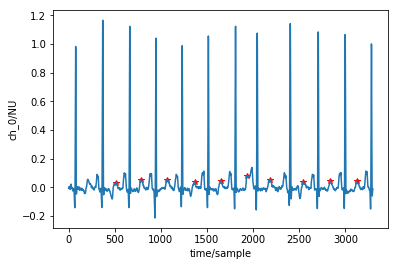

In [ ]:
all_height_p = []
all_height_t = []
all_durations_p = []
all_durations_t = []

all_height_p_neg = []
all_height_t_neg = []
all_durations_p_neg = []
all_durations_t_neg = []

min_height = []
all_p_r_durations = []
all_r_t_durations = []
for patient in mitdb.patient_records:
    p_positives, p_negatives, p_properties, t_positives, t_negatives, t_properties = p_and_t_peak_properties_extractor(patient)
    p_height = np.asarray(p_properties["height"])
    t_height = np.asarray(t_properties["height"])
    all_height_p.extend(p_height[:,0])
    all_height_p_neg.extend(p_height[:,1])
    all_height_t.extend(t_height[:,0])
    all_height_t_neg.extend(t_height[:,1])
    
    
    p_duration = np.asarray(p_properties["durations"])
    t_duration= np.asarray(t_properties["durations"])
    all_durations_p.extend(p_duration[:,0])
    all_durations_t.extend(t_duration[:,0])
    all_durations_p_neg.extend(p_duration[:,1])
    all_durations_t_neg.extend(t_duration[:,1])







Patient file:  100 begins


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:131: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


Patient file:  101 begins
Patient file:  102 begins
Patient file:  103 begins
Patient file:  104 begins
Patient file:  105 begins
Patient file:  106 begins
Patient file:  107 begins
Patient file:  108 begins
Patient file:  109 begins
Patient file:  111 begins
Patient file:  112 begins
Patient file:  113 begins
Patient file:  114 begins
Patient file:  115 begins
Patient file:  116 begins
Patient file:  117 begins
Patient file:  118 begins
Patient file:  119 begins


 
    """"
    for i in range(0, len(q_properties["height"])):
        
        q_r_durations = sub_signal_interval(patient.time, q_points[i], patient.segmented_R_pos[i] ,0)
        all_q_r_durations.append(q_r_durations)
        r_s_durations = sub_signal_interval(patient.time, patient.segmented_R_pos[i],  s_points[i] ,0)
        all_r_s_durations.append(r_s_durations)
        if(s_properties["durations"][i] > 0.15 ):
            print(patient.filename, s_points[i], s_properties["height"][i], i)
            min_height.append(r_s_durations)    
    """"

In [166]:

all_height_p = []
all_height_t = []
all_durations_p = []
all_durations_t = []

all_height_p_neg = []
all_height_t_neg = []
all_durations_p_neg = []
all_durations_t_neg = []

min_height = []
all_p_r_durations = []
all_r_t_durations = []
for patient in mitdb.patient_records:
    p_positives, p_negatives, p_properties, t_positives, t_negatives, t_properties = p_and_t_peak_properties_extractor(patient)
    p_height = np.asarray(p_properties["height"])
    t_height = np.asarray(t_properties["height"])
    
   
    
    
    p_duration = np.asarray(p_properties["durations"])
    t_duration= np.asarray(t_properties["durations"])
    print(len(p_positives),len(t_positives), len(p_negatives), len(t_negatives),len(patient.segmented_R_pos))
    
    for i in range(0,len(p_positives)):
        
        p_r_duration = sub_signal_interval(patient.time, int(p_positives[i]), int(patient.segmented_R_pos[i]),0)
        r_t_duration = sub_signal_interval(patient.time, int(patient.segmented_R_pos[i]), int(t_positives[i]),0)
        all_p_r_durations.append((patient.filename,p_positives[i],p_r_duration,i))
        all_r_t_durations.append((patient.filename, t_positives[i],r_t_duration,i))
        
        all_height_p.append((patient.filename,p_positives[i],p_height[:,0][i],i))
        all_height_t.append((patient.filename,t_positives[i],t_height[:,0][i],i))
        all_height_p_neg.append((patient.filename,p_negatives[i],p_height[:,1][i],i))
        all_height_t_neg.append((patient.filename,t_negatives[i],t_height[:,1][i],i))
        all_durations_p.append((patient.filename,p_positives[i],p_duration[:,0][i],i))
        all_durations_t.append((patient.filename,t_positives[i],t_duration[:,0][i],i))
        all_durations_p_neg.append((patient.filename,p_negatives[i],p_duration[:,1][i],i))
        all_durations_t_neg.append((patient.filename,t_negatives[i],t_duration[:,1][i],i))
        

Patient file:  100 begins


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:131: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


2271 2271 2271 2271 2271
Patient file:  101 begins
1872 1872 1872 1872 1872
Patient file:  102 begins
2189 2189 2189 2189 2189
Patient file:  103 begins
2089 2089 2089 2089 2089
Patient file:  104 begins
2308 2308 2308 2308 2308
Patient file:  105 begins
2690 2690 2690 2690 2690
Patient file:  106 begins
2097 2097 2097 2097 2097
Patient file:  107 begins
2138 2138 2138 2138 2138
Patient file:  108 begins
1822 1822 1822 1822 1822
Patient file:  109 begins
2532 2532 2532 2532 2532
Patient file:  111 begins
2132 2132 2132 2132 2132
Patient file:  112 begins
2547 2547 2547 2547 2547
Patient file:  113 begins
1793 1793 1793 1793 1793
Patient file:  114 begins
1889 1889 1889 1889 1889
Patient file:  115 begins
1959 1959 1959 1959 1959
Patient file:  116 begins
2419 2419 2419 2419 2419
Patient file:  117 begins
1537 1537 1537 1537 1537
Patient file:  118 begins
2299 2299 2299 2299 2299
Patient file:  119 begins
2093 2093 2093 2093 2093
Patient file:  121 begins
1873 1873 1873 1873 1873
Patien

In [ ]:
x ,y  = np.unique(all_height_p, return_counts=True) # counting occurrence of each loan
plt.scatter(x,y)
print(y[0])

48


In [84]:
patient = mitdb.patient_records[23]
q_points, q_properties,  s_points, s_properties = q_s_peak_properties_extractor(patient)

Patient file:  200 begins


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:133: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


In [90]:
#[630288, 630646, 631013, 631290, 631726]
#[630244, 630625, 630982, 631340, 631695]

starting_point = 18000
end_point = 19000
start_index = 77
end_index = 80
index = list(range(starting_point,end_point))
sig = patient.filtered_MLII[index]
annd = s_points[start_index:end_index]
transform_annd = [origin_to_new_point(starting_point,p)for p in annd]

transform_annd = np.asarray(transform_annd)


index = list(range(starting_point,end_point))
sig = patient.filtered_MLII[index]
annd = patient.segmented_R_pos[start_index:end_index]
r_peaks = [origin_to_new_point(starting_point,p)for p in annd]

r_peaks = np.asarray(r_peaks)

index = list(range(starting_point,end_point))
sig = patient.filtered_MLII[index]
annd = patient.annotated_R_poses[start_index+1:end_index+1]
r_peaks_ori = [origin_to_new_point(starting_point,p)for p in annd]

r_peaks_ori = np.asarray(r_peaks_ori)

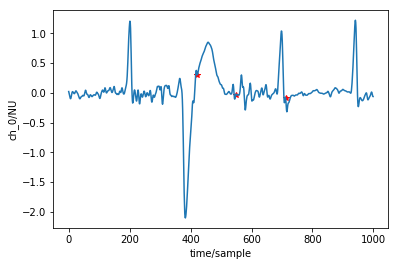

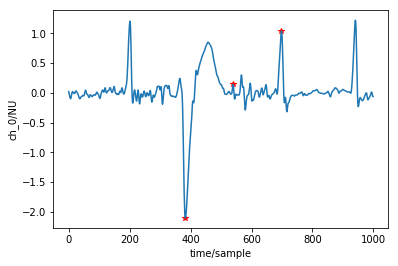

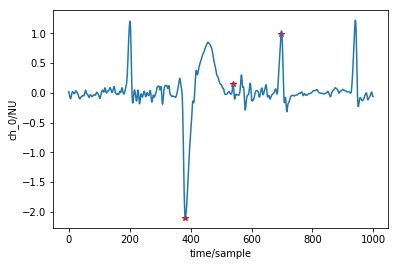

In [91]:
wfdb.plot_items(signal=sig, ann_samp=[transform_annd])
wfdb.plot_items(signal=sig, ann_samp=[r_peaks])
wfdb.plot_items(signal=sig, ann_samp=[r_peaks_ori])



In [21]:
patient = mitdb.patient_records[]


Patient file:  114 begins


C:\Users\chont\Anaconda3\lib\site-packages\ipykernel_launcher.py:129: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


In [85]:
print(s_points[77:80])
#patient.segmented_R_pos[1817:1822]

[18422, 18548, 18712]


In [ ]:
200 18548 0.312 78

In [5]:
mit100 = load_database.load_patient_record("mitdb","100")
mit100.set_segmented_beats_r_pos(winL=100,winR=200)


C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/100
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/100.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/100.txt
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/p_t_wave/100pt.csv
Start segmenting records: 100
Filtered MLII records from : 100
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 100 completes.
Processing file: 100
Patient file:  100 begins
Patient file:  100 processing end
Done proecessing: 100


In [6]:
mit100.set_r_properties_MLII()
mit100.set_Q_S_points_MLII()
mit100.set_P_T_points_MLII()

Processing file: 100
Patient file:  100 begins
Patient file:  100 processing end
Done proecessing: 100
Processing file: 100
Patient file:  100 begins
Done proecessing: 100
Processing file: 100
Patient file:  100 begins
Done proecessing: 100


In [67]:
QRS_properties, P_Q_properties, P_Q_neg, P_R_properties, P_R_neg, S_T_properties, S_T_neg,R_T_properties, R_T_neg, P_T_properties,neg_P_T, P_T_neg, neg_P_T_neg=interval_and_average(mit100)

In [17]:
mit100.P_points_properites["onset"][3][1]

1191

0.10733685601056762
0.1073465845788825
0.10733580037440622
 
0.2242575957727893
0.22429690453633863
0.2242939237010476
 
0.25934786437692636
0.25938665487357704
0.25938622525442656
0.2000977542932616
 
0.36798326728313613
0.3679577500011139
0.36804018275888895
0.5400330250990769
 
0.33144826067811867
0.33138781494571085
0.3314685991744202
0.5035579040070495
 
0.13026243945398544
0.13007475597327003
0.13011284315274949
0.1942135623073556
0.2990774988991642
0.35804931748128815


In [31]:
len(neg_P_T_neg)

2271

In [78]:
P_Q_properties["interval"]

[0.1469999999999999,
 0.21099999999999985,
 0.21599999999999975,
 0.2280000000000002,
 0.22199999999999998,
 0.21700000000000053,
 0.3329999999999993,
 0.21699999999999964,
 0.22499999999999964,
 0.20800000000000018,
 0.20800000000000018,
 0.21199999999999974,
 0.24099999999999966,
 0.23099999999999987,
 0.22499999999999964,
 0.21700000000000053,
 0.2190000000000012,
 0.21899999999999942,
 0.2079999999999984,
 0.2220000000000013,
 0.22800000000000153,
 0.23600000000000065,
 0.2270000000000003,
 0.22500000000000142,
 0.21899999999999764,
 0.21600000000000108,
 0.22499999999999787,
 0.22699999999999676,
 0.22199999999999775,
 0.2220000000000013,
 0.23300000000000054,
 0.2220000000000013,
 0.22799999999999798,
 0.21699999999999875,
 0.2170000000000023,
 0.23300000000000054,
 0.21699999999999875,
 0.22799999999999798,
 0.21999999999999886,
 0.21399999999999864,
 0.2190000000000012,
 0.22499999999999432,
 0.22799999999999443,
 0.22999999999999687,
 0.23899999999999721,
 0.21399999999999864,

In [101]:
for i in range(0,len(mit100.P_points)):
    print(i)
    print(mit100.time[int(mit100.Q_points_properites["onset"][i])])
    print(mit100.time[int(mit100.S_points_properites["offset"][i])])

0
0.969
1.078
1
1.786
1.889
2
2.569
2.678
3
3.367
3.467
4
4.153
4.256
5
4.969
5.075
6
5.625
5.728
7
6.614
6.725
8
7.461
7.564
9
8.272
8.375
10
9.064
9.167
11
9.836
9.936
12
10.675
10.778
13
11.522
11.633
14
12.35
12.453
15
13.181
13.283
16
14.0
14.106
17
14.797
14.9
18
15.583
15.7
19
16.386
16.489
20
17.206
17.311
21
18.072
18.178
22
18.9
19.003
23
19.683
19.786
24
20.464
20.583
25
21.25
21.353
26
22.036
22.139
27
22.839
22.956
28
23.664
23.767
29
24.492
24.597
30
25.339
25.442
31
26.139
26.25
32
26.917
27.022
33
27.717
27.819
34
28.503
28.611
35
29.358
29.469
36
30.203
30.311
37
31.033
31.136
38
31.833
31.939
39
32.667
32.772
40
33.464
33.564
41
34.239
34.356
42
35.069
35.172
43
35.911
36.019
44
36.783
36.9
45
37.619
37.719
46
38.394
38.5
47
39.197
39.3
48
40.008
40.111
49
40.808
40.911
50
41.642
41.747
51
42.472
42.578
52
43.294
43.403
53
44.111
44.214
54
44.894
45.006
55
45.675
45.786
56
46.486
46.592
57
47.331
47.433
58
48.161
48.267
59
48.983
49.1
60
49.797
49.9
61
50.567
50.681
6

479
384.933
385.047
480
385.744
385.85
481
386.511
386.614
482
387.278
387.381
483
388.053
388.158
484
388.861
388.964
485
389.667
389.783
486
390.5
390.603
487
391.283
391.386
488
392.033
392.139
489
392.783
392.892
490
393.503
393.617
491
394.228
394.333
492
394.964
395.069
493
395.722
395.825
494
396.464
396.567
495
397.189
397.3
496
397.903
398.006
497
398.597
398.7
498
399.294
399.397
499
400.014
400.119
500
400.733
400.842
501
401.492
401.597
502
402.253
402.361
503
403.031
403.136
504
403.783
403.886
505
404.519
404.622
506
405.231
405.333
507
405.972
406.075
508
406.739
406.842
509
407.539
407.653
510
408.314
408.417
511
409.083
409.189
512
409.847
409.95
513
410.592
410.694
514
411.325
411.433
515
412.053
412.175
516
412.825
412.931
517
413.603
413.706
518
414.394
414.508
519
415.189
415.294
520
415.967
416.072
521
416.694
416.797
522
417.447
417.558
523
418.211
418.314
524
418.969
419.075
525
419.728
419.833
526
420.519
420.625
527
421.325
421.442
528
422.097
422.197
529
422.

979
771.192
771.297
980
771.95
772.058
981
772.753
772.858
982
773.606
773.708
983
774.425
774.533
984
775.214
775.322
985
776.006
776.111
986
776.544
776.65
987
777.492
777.6
988
778.297
778.408
989
779.142
779.247
990
779.986
780.089
991
780.803
780.911
992
781.617
781.719
993
782.397
782.497
994
783.153
783.256
995
783.906
784.031
996
784.7
784.808
997
785.497
785.608
998
786.322
786.428
999
787.136
787.242
1000
787.919
788.025
1001
788.675
788.781
1002
789.433
789.539
1003
790.183
790.306
1004
790.981
791.1
1005
791.814
791.919
1006
792.614
792.725
1007
793.422
793.528
1008
794.211
794.317
1009
794.972
795.078
1010
795.731
795.844
1011
796.503
796.614
1012
797.311
797.414
1013
798.136
798.258
1014
798.972
799.094
1015
799.789
799.894
1016
800.572
800.675
1017
801.35
801.456
1018
802.133
802.253
1019
802.933
803.039
1020
803.758
803.864
1021
804.578
804.681
1022
805.414
805.525
1023
806.211
806.319
1024
806.997
807.097
1025
807.761
807.864
1026
808.569
808.692
1027
809.394
809.517
1

1172.256
1479
1173.058
1173.164
1480
1173.842
1173.947
1481
1174.442
1174.544
1482
1175.4
1175.506
1483
1176.228
1176.331
1484
1177.072
1177.181
1485
1177.897
1178.006
1486
1178.667
1178.769
1487
1179.433
1179.536
1488
1180.203
1180.308
1489
1181.017
1181.128
1490
1181.853
1181.972
1491
1182.692
1182.794
1492
1183.494
1183.6
1493
1184.333
1184.439
1494
1185.114
1185.219
1495
1185.886
1185.989
1496
1186.681
1186.786
1497
1187.508
1187.614
1498
1188.353
1188.458
1499
1189.192
1189.294
1500
1189.981
1190.083
1501
1190.772
1190.878
1502
1191.589
1191.692
1503
1192.367
1192.486
1504
1193.164
1193.267
1505
1194.019
1194.125
1506
1194.847
1194.953
1507
1195.692
1195.8
1508
1196.486
1196.589
1509
1197.256
1197.369
1510
1198.042
1198.147
1511
1198.872
1198.981
1512
1199.697
1199.8
1513
1200.519
1200.631
1514
1201.356
1201.464
1515
1202.164
1202.267
1516
1202.947
1203.056
1517
1203.736
1203.839
1518
1204.522
1204.628
1519
1205.058
1205.164
1520
1206.083
1206.192
1521
1206.925
1207.031
1522
1207.

1577.903
1979
1578.625
1578.733
1980
1579.453
1579.561
1981
1580.267
1580.386
1982
1581.067
1581.172
1983
1581.839
1581.942
1984
1582.608
1582.725
1985
1583.439
1583.544
1986
1584.289
1584.4
1987
1585.133
1585.236
1988
1585.936
1586.042
1989
1586.739
1586.844
1990
1587.544
1587.658
1991
1588.358
1588.469
1992
1589.172
1589.278
1993
1590.019
1590.128
1994
1590.861
1590.969
1995
1591.722
1591.828
1996
1592.522
1592.628
1997
1593.303
1593.403
1998
1594.089
1594.197
1999
1594.925
1595.031
2000
1595.578
1595.689
2001
1596.569
1596.675
2002
1597.431
1597.536
2003
1598.239
1598.347
2004
1599.05
1599.153
2005
1599.831
1599.933
2006
1600.633
1600.739
2007
1601.475
1601.578
2008
1602.339
1602.444
2009
1603.175
1603.278
2010
1603.986
1604.094
2011
1604.781
1604.883
2012
1605.564
1605.675
2013
1606.356
1606.467
2014
1607.15
1607.275
2015
1608.003
1608.108
2016
1608.844
1608.95
2017
1609.522
1609.628
2018
1610.475
1610.578
2019
1611.25
1611.369
2020
1612.047
1612.153
2021
1612.853
1612.958
2022
161

In [87]:
mit100.time[int(mit100.P_points_properites["onset"][0][3])]

IndexError: tuple index out of range

In [107]:
print(mit100.P_points_properites["onset"][0][0])
mit100.T_points_properites["offset"][0][0]

314


416

In [93]:
t_points = np.asarray(mit100.T_points[0:5],dtype=int)
p_points = np.asarray(mit100.P_points[0:5],dtype=int)

In [94]:
print(t_points)
print(p_points)

[ 518  782 1063 1368 1652]
[ 321  604  884 1167 1465]


In [108]:
mit100.T_points_properites["offset"]

[(416, 364),
 (521, 477),
 (816, 699),
 (1097, 1055),
 (1388, 1342),
 (1656, 1564),
 (1973, 1917),
 (2216, 2164),
 (2564, 2515),
 (2861, 2749),
 (3153, 3103),
 (3434, 3394),
 (3719, 3669),
 (4020, 3974),
 (4337, 4283),
 (4624, 4577),
 (4921, 4818),
 (5212, 5104),
 (5503, 5454),
 (5786, 5741),
 (6085, 6034),
 (6363, 6328),
 (6680, 6634),
 (6975, 6929),
 (7258, 7146),
 (7545, 7501),
 (7826, 7781),
 (8116, 8060),
 (8404, 8357),
 (8708, 8655),
 (8980, 8945),
 (9293, 9177),
 (9583, 9537),
 (9851, 9819),
 (10156, 10112),
 (10447, 10315),
 (10757, 10632),
 (11053, 11006),
 (11365, 11302),
 (11633, 11583),
 (11921, 11882),
 (12220, 12173),
 (12506, 12463),
 (12806, 12689),
 (13119, 13069),
 (13429, 13374),
 (13709, 13669),
 (13996, 13946),
 (14278, 14240),
 (14570, 14531),
 (14876, 14819),
 (15170, 15119),
 (15476, 15425),
 (15761, 15717),
 (16054, 16005),
 (16342, 16206),
 (16626, 16581),
 (16909, 16866),
 (17221, 17116),
 (17509, 17466),
 (17805, 17765),
 (18102, 18053),
 (18378, 18333),
 (1